![](https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/LinePurplePink.jpg?raw=true)

# <center>Introduction</center>
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/intro.png?raw=true" width="100"/>


---


### Stroke - a sudden change in the blood supply to a part of the brain, sometimes causing a loss of the ability to move particular parts of the body.

### In this work, we will try to analyze all the factors influencing this disease, to extract their influence with Exploratory data analysis and also build a model to predict the possible occurrence of disease in a patient.

# Stroke Prediction

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataseet
ds=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [3]:
# after read the datasheet 
ds

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Exploratory Data Analysis

In [4]:
# Checking the data like (How many row and columns we have in this current dataSheet)
ds.shape

(5110, 12)

here We can see we have 5110 columns and 12 rows

1. **Check Missing Values And There Datatypes**

In [5]:
# checking data types in This Current DataSheet
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Features and There Dataypes**


*   ID | 5110(non-null values) | int64 (datatype)
*   gender | 5110(non-null values) | Object (datatype)
*   age | 5110(non-null values) | float64 (datatype)
*   hypertension | 5110(non-null values) | int64 (datatype)
*   heart_disease | 5110(non-null values) | int64 (datatype)
*   ever_married | 5110(non-null values) | Object (datatype)
*   work_type | 5110(non-null values) | Object (datatype)
*   residence_type | 5110(non-null values) | Object (datatype)
*   avg_glucose_level | 5110(non-null values) | float64 (datatype)
*   bmi | 4909(non-null values) | float64 (datatype) 
*   smoking_status | 5110(non-null values) | Object (datatype)

**Target Feature**

*   Stroke | 5110(non-null values) | int64(datatype)















In [6]:
# count the null value in this current datasheet
ds.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Here we have **201** null values in **bmi** (Body Mass index) columns.

In [7]:
# Check the 
ds.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
# Copy the dataset into new variable
ds1=ds.copy()

In [9]:
# id features does not play imp role, show we drop the id column
ds1.drop(['id'],axis=1, inplace=True)

# **Explore the Categorical Features**

In [10]:
categorical_features=[feature for feature in ds1.columns if ((ds1[feature].dtypes=='O'))]
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [11]:
# Check the highest mumber of catagorical values
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(ds1[feature].unique())))

The feature is gender and number of categories are 3
The feature is ever_married and number of categories are 2
The feature is work_type and number of categories are 5
The feature is Residence_type and number of categories are 2
The feature is smoking_status and number of categories are 4


**Take-away:**

*  there are 5 categorical features
*   feature work_type and smoking_status has highest number of categorical values



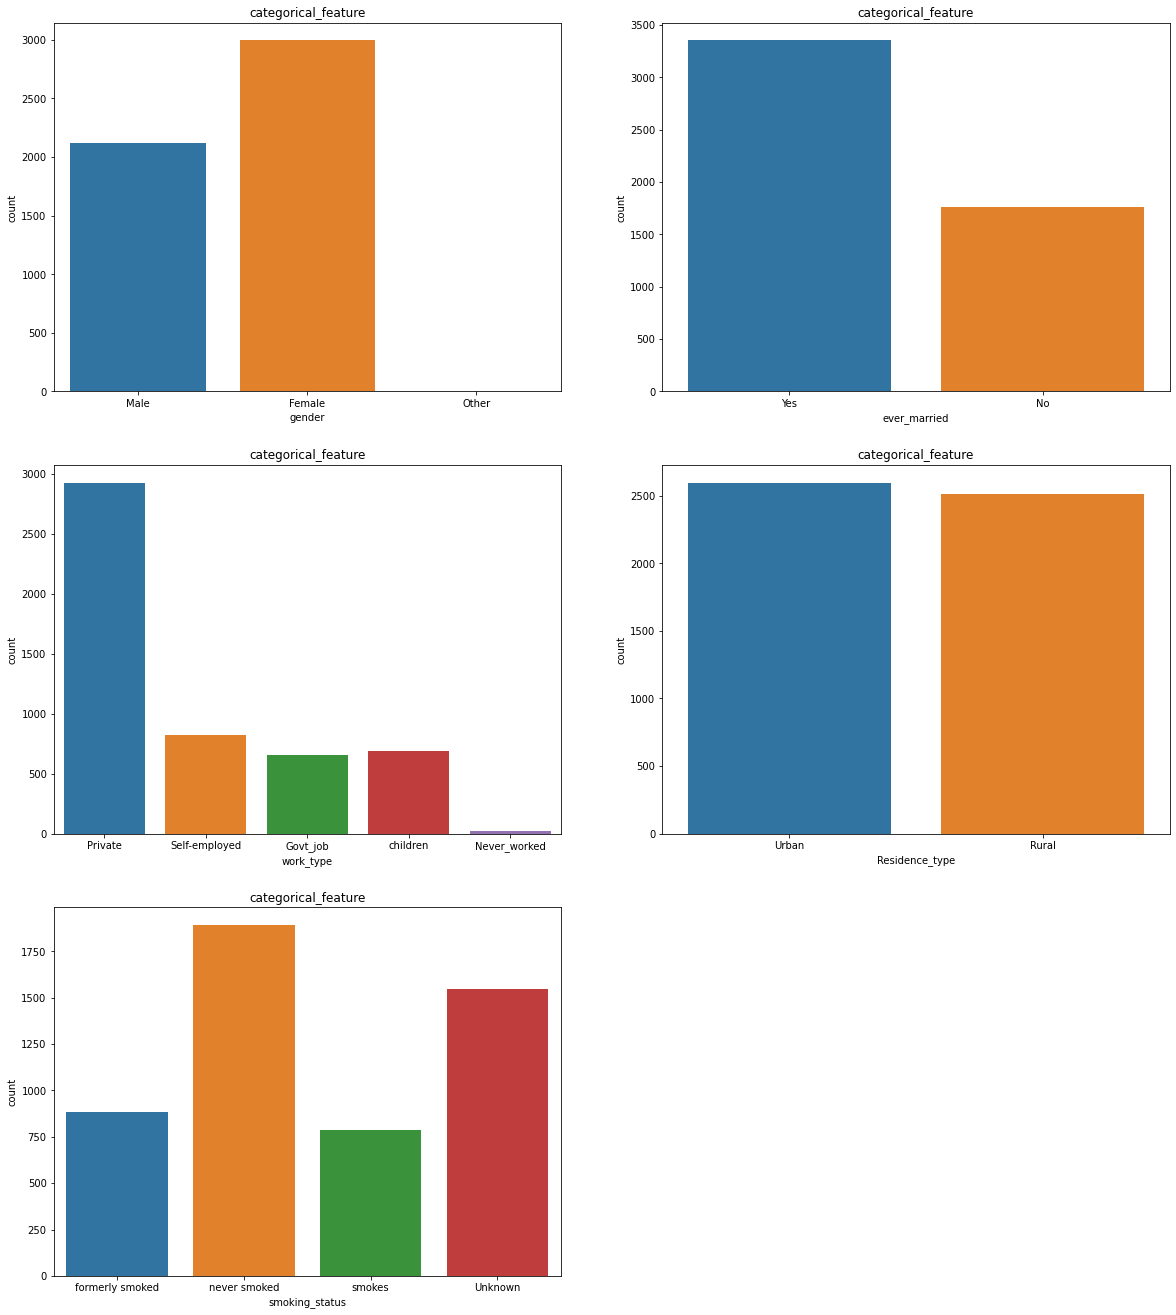

In [12]:
#check count based on categorical features
plt.figure(figsize=(20,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(10,2,plotnumber)
    sns.countplot(x=categorical_feature,data=ds1)
    plt.xlabel(categorical_feature)
    plt.title('categorical_feature')
    plotnumber+=1
plt.show()

Text(0.5, 1.0, 'Gender vs Stroke')

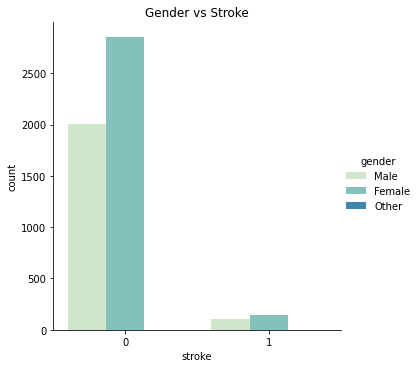

In [13]:
sns.catplot(x='stroke',hue='gender', palette='GnBu',kind='count',data=ds1)
plt.title('Gender vs Stroke')

Text(0.5, 1.0, 'Marride vs Stroke')

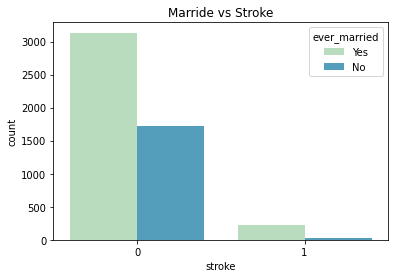

In [14]:
sns.countplot(x='stroke',hue='ever_married', palette='GnBu',data=ds1)
plt.title('Marride vs Stroke')

Text(0.5, 1.0, 'Work Type vs Stroke')

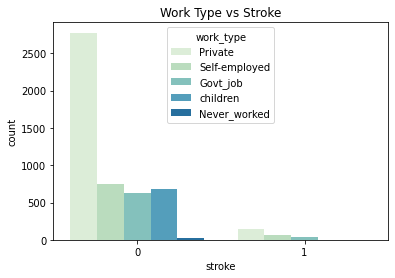

In [15]:
 sns.countplot(x='stroke',hue='work_type', palette='GnBu',data=ds1)
 plt.title('Work Type vs Stroke')

Text(0.5, 1.0, 'Smoking Status vs Stroke')

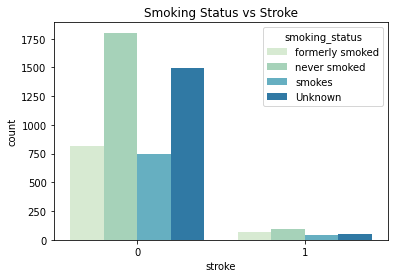

In [16]:
 sns.countplot(x='stroke',hue='smoking_status', palette='GnBu',data=ds1)
 plt.title('Smoking Status vs Stroke')

<Figure size 1080x864 with 0 Axes>

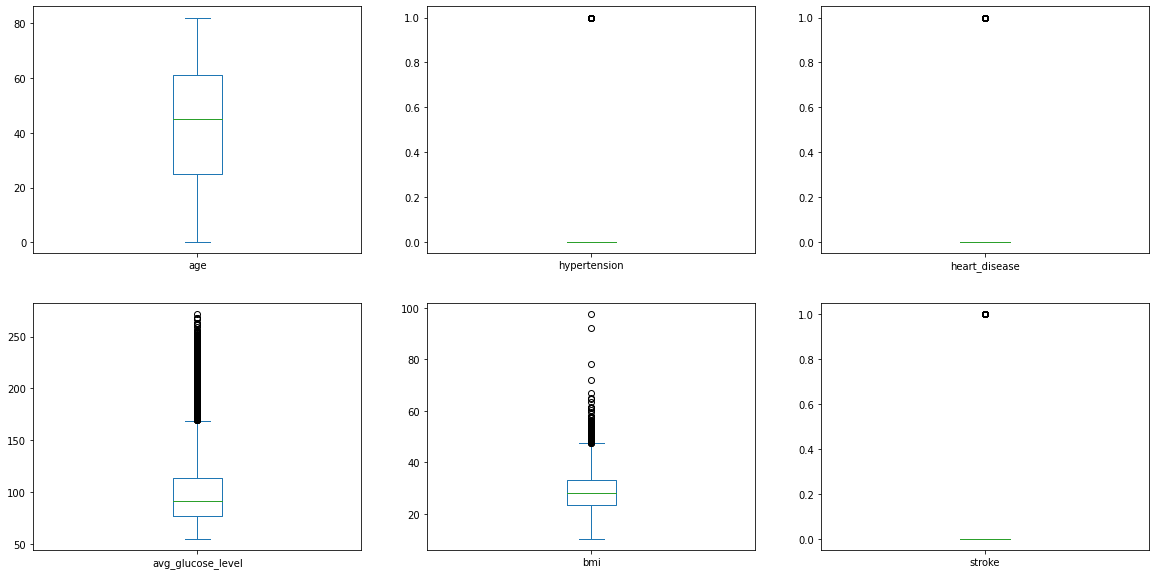

In [17]:
# Boxplot:
plt.figure(figsize=(15,12))
ds1.plot(kind='box', subplots=True, layout=(2,3), figsize=(20, 10))
plt.show()

**Take-Away:**
avg_glucose_level and bmi has so many Outlier. But we have to desided to stay this outlier. 

**Explore the Numerical Features**

In [18]:
numerical_features=[feature for feature in ds1.columns if ((ds1[feature].dtypes!='O'))]
numerical_features

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [19]:
# Categorized discrete features
discrete_feature=[feature for feature in numerical_features if len(ds1[feature].unique())<3]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [20]:
discrete_feature

['hypertension', 'heart_disease', 'stroke']

Text(0.5, 1.0, 'Heart Diseases vs Stroke')

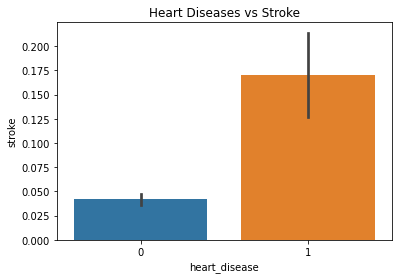

In [21]:
sns.barplot(x='heart_disease',y='stroke',data=ds1)
plt.title('Heart Diseases vs Stroke')

**Take Away:**

In this bar plot, person who have heart_disease they have stroke 

Text(0.5, 1.0, 'Hypertension vs Stroke')

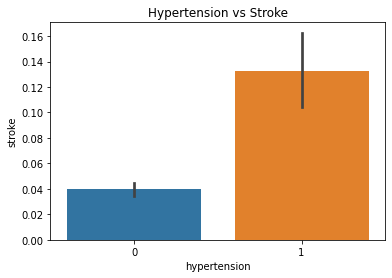

In [22]:
sns.barplot(x='hypertension',y='stroke',data=ds1)
plt.title('Hypertension vs Stroke')

**Take Away:**

In this bar plot, person who have Hypertension. They have stroke attack

In [23]:
# Categorized cotinuous features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['stroke']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 3


In [24]:
continuous_features

['age', 'avg_glucose_level', 'bmi']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

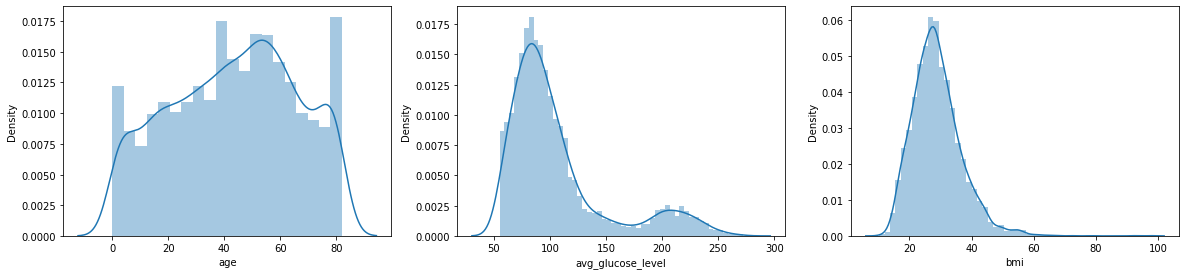

In [25]:
# Checking continuous_features is symmetric/skew-symmetric using visualization
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(ds1[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

Take-away:

1.   bmi and avg_glucose_level is skew-symmetric data

# Preprocessing

In [26]:
ds2=ds1.copy()

In [27]:
# Replace Missing Values with Median
ds2['bmi'] = ds2['bmi'].fillna(ds2['bmi'].median(),inplace=False)

**Skew Divition to Normal Divition**

Text(0.5, 1.0, 'Before Symmetric')

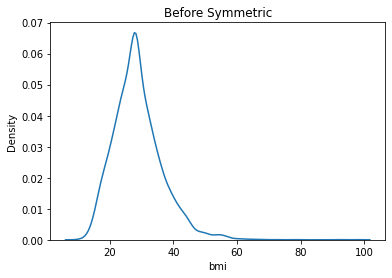

In [28]:
# # Using Kdeplot
sns.kdeplot(ds2['bmi'])
plt.title('Before Symmetric')

In [29]:
# # # Symmetric using log
# ds2['bmi'] = np.log(ds2['bmi'])

Text(0.5, 1.0, 'After Symmetric')

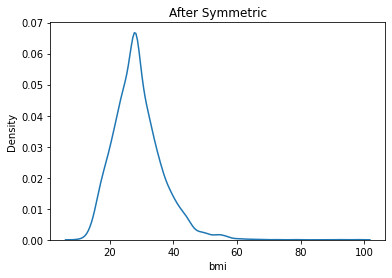

In [30]:
# # Using Kdeplot
sns.kdeplot(ds2['bmi'])
plt.title('After Symmetric')

Text(0.5, 1.0, 'Before Symmetric')

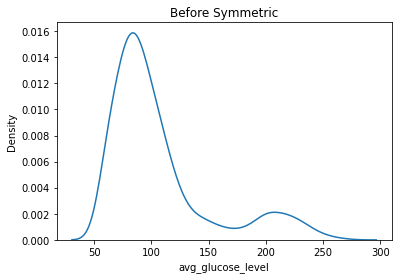

In [31]:
sns.kdeplot(ds2['avg_glucose_level'])
plt.title('Before Symmetric')

In [32]:
# ds2['avg_glucose_level'] = np.log(ds2['avg_glucose_level'])
# sns.kdeplot(ds2['avg_glucose_level'])
# plt.title('After Symmetric')

# **Encoding**

In [33]:
# Using LabelEncoding
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

work_type = en.fit_transform(ds2['work_type'])
smoking_status = en.fit_transform(ds2['smoking_status'])
gender = en.fit_transform(ds2['gender'])
ever_married = en.fit_transform(ds2['ever_married'])
Residence_type = en.fit_transform(ds2['Residence_type'])

ds2['work_type']=work_type
ds2['smoking_status']=smoking_status
ds2['gender'] = gender
ds2['ever_married'] = ever_married
ds2['Residence_type']= Residence_type

In [34]:
ds2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [35]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


# Imbalance Data Handling

In [36]:
ds3=ds2.copy()

In [37]:
ds3.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [38]:
X = ds3.drop('stroke', axis=1)
y = ds3['stroke']

In [39]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

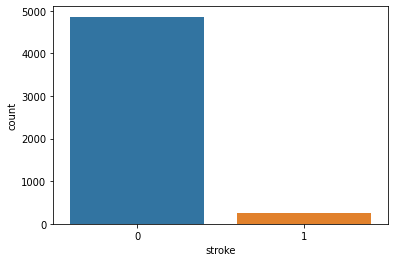

In [40]:
sns.countplot(x=y)

In this plot we can clearly seen that data imbalance data in stroke feature 

In [41]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2
5106,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,1,51.0,0,0,1,2,0,166.29,25.6,1


In [42]:
# # Import RandomOverSampler Function

from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler()
X_oversampler, y_oversampler = oversampler.fit_resample(X, y)

In [43]:
# import collection libary
# Before Appling SMOTE function

from collections import Counter
print('Before SMOTE: ',Counter(y))
# After Appling RandomOverSampler Function
print('After SMOTE: ',Counter(y_oversampler))

Before SMOTE:  Counter({0: 4861, 1: 249})
After SMOTE:  Counter({1: 4861, 0: 4861})


In [44]:
# Spliting Data for Traing & Testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_oversampler, y_oversampler, test_size=0.2, random_state=0)
print(f'Train : {X_train.shape}')
print(f'Test: {X_test.shape}')

Train : (7777, 10)
Test: (1945, 10)


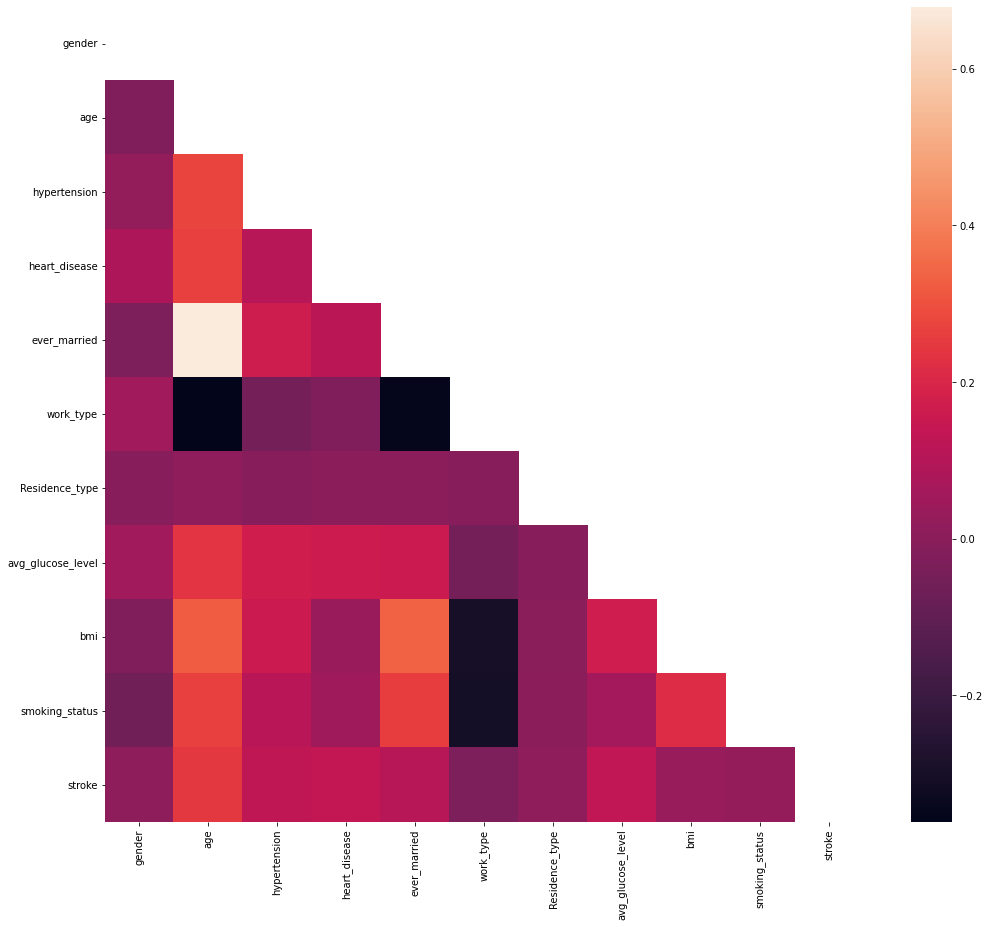

In [45]:
# Heatmap
plt.figure(figsize=(17, 15))
corr_mask = np.triu(ds3.corr())
h_map = sns.heatmap(ds3.corr(), mask=corr_mask)
h_map

# Normalize

In [46]:
# Standardization Using StandarScaler

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [47]:
X_train_std

array([[ 1.16506724,  0.22756256, -0.46016107, ..., -0.49940377,
         0.941999  ,  1.52184844],
       [-0.85741667,  0.09138769, -0.46016107, ...,  1.73662814,
         0.22979715, -1.39687297],
       [-0.85741667,  0.09138769, -0.46016107, ...,  1.83187385,
         1.14548524,  1.52184844],
       ...,
       [ 1.16506724, -0.54409504, -0.46016107, ..., -0.96038581,
         0.72397802, -1.39687297],
       [-0.85741667,  0.27295419, -0.46016107, ..., -0.85653032,
        -0.49693942, -0.42396583],
       [-0.85741667,  0.13677931,  2.17315212, ..., -1.080564  ,
         0.54956124,  0.5489413 ]])

In [48]:
import pickle
pickle.dump(std, open('StandarScaler.pkl', 'wb'))

# Model Creation

In [49]:
# Import Libary for Classification Reports
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
# Function for Confusion martix  for every models
def col_max(model):
  df_cm = pd.DataFrame(model, index = ['Stroke', 'Normal'],
                                columns = ['Stroke', 'Normal'])

  p = sns.heatmap(df_cm, annot=True, cmap="YlGnBu" ,fmt='g')
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
# ===========================================
# for model results and model name
models_results = np.zeros(5)
m_name=['Decision Tree','Random Forest','Gradient Boosting','KNeighbors Classifier','Artificial Neural networks']

# DecisionTreeClassifier

Train Accuracy : 1.00000
Test Accuracy : 0.97943
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       973
           1       0.96      1.00      0.98       972

    accuracy                           0.98      1945
   macro avg       0.98      0.98      0.98      1945
weighted avg       0.98      0.98      0.98      1945



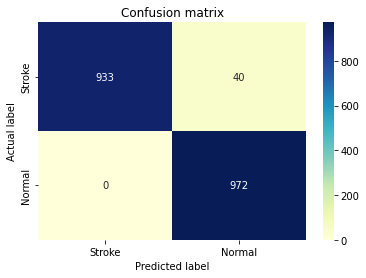

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
DTC=dtc.fit(X_train_std, y_train).predict(X_test_std)

print('Train Accuracy : {:.5f}'.format(dtc.score(X_train_std, y_train)))
print('Test Accuracy : {:.5f}'.format(dtc.score(X_test_std, y_test)))
print('=============================================================')
print(classification_report(y_test, DTC))
print('=============================================================')
DTCm = confusion_matrix(y_test, DTC)

models_results[0]=dtc.score(X_test_std, y_test)
# confusion_matrix visualization for DecisionTreeClassifier
col_max(DTCm)

# RandomForestClassifier

Train Accuracy : 1.00000
Test Accuracy : 0.99229
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       973
           1       0.98      1.00      0.99       972

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



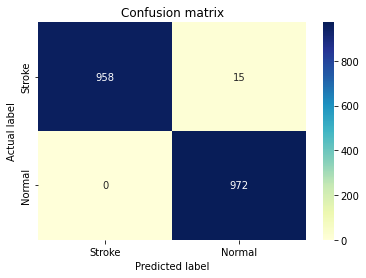

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
RFC=rfc.fit(X_train_std, y_train).predict(X_test_std)
print('Train Accuracy : {:.5f}'.format(rfc.score(X_train_std, y_train)))
print('Test Accuracy : {:.5f}'.format(rfc.score(X_test_std, y_test)))
print('=============================================================')
print(classification_report(y_test, RFC))
print('=============================================================')
RFCm = confusion_matrix(y_test, RFC)

models_results[1]=rfc.score(X_test_std, y_test)
# confusion_matrix visualization for RandomForestClassifier
col_max(RFCm)

# GradientBoostingClassifier

Train Accuracy : 0.85676
Test Accuracy : 0.85810
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       973
           1       0.82      0.92      0.87       972

    accuracy                           0.86      1945
   macro avg       0.86      0.86      0.86      1945
weighted avg       0.86      0.86      0.86      1945



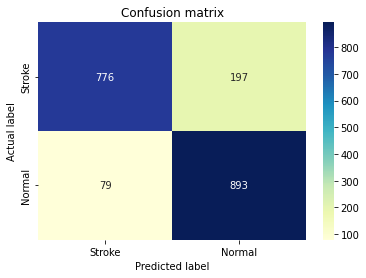

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
GBC=gbc.fit(X_train_std, y_train).predict(X_test_std)
print('Train Accuracy : {:.5f}'.format(gbc.score(X_train_std, y_train)))
print('Test Accuracy : {:.5f}'.format(gbc.score(X_test_std, y_test)))
print('=============================================================')
print(classification_report(y_test, GBC))
print('=============================================================')
GBCm=(confusion_matrix(y_test, GBC))

models_results[2]=gbc.score(X_test_std, y_test)
# confusion_matrix visualization for GradientBoostingClassifier
col_max(GBCm)

# KNeighborsClassifier

Train Accuracy : 0.94702
Test Accuracy : 0.92494
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       973
           1       0.87      1.00      0.93       972

    accuracy                           0.92      1945
   macro avg       0.93      0.92      0.92      1945
weighted avg       0.93      0.92      0.92      1945



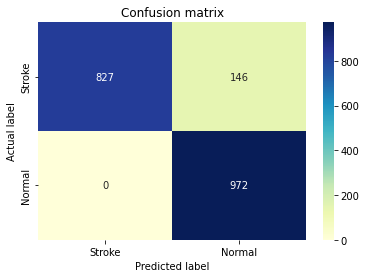

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knc= KNeighborsClassifier()
KNC=knc.fit(X_train_std, y_train).predict(X_test_std)
print('Train Accuracy : {:.5f}'.format(knc.score(X_train_std, y_train)))
print('Test Accuracy : {:.5f}'.format(knc.score(X_test_std, y_test)))
print('=============================================================')
print(classification_report(y_test, KNC))
print('=============================================================')
KNCm=(confusion_matrix(y_test, KNC))

models_results[3]=knc.score(X_test_std, y_test)
# confusion_matrix visualization for KNeighborsClassifier
col_max(KNCm)

# Artificial Neural networks (ANN)

In [55]:
# Libary for ANN
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
ANN = Sequential()

In [56]:
#ANN Model
ANN.add(Dense(64,activation='relu'))
ANN.add(Dense(32,activation='relu'))
ANN.add(Dense(32,activation='relu'))
ANN.add(Dense(32,activation='relu'))
ANN.add(Dense(8,activation='relu'))
ANN.add(Dense(4,activation='relu'))
ANN.add(Dense(4,activation='relu'))
ANN.add(Dense(2,activation='relu'))
ANN.add(Dense(1, activation='sigmoid'))

In [57]:
# # ANN Compiler
ANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [58]:
# Early Stopping Callback 
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=4 , min_delta=0.001)

In [59]:
# # ANN Model Fit
ANN.fit(x=X_train_std, y=y_train,
          validation_data=(X_test_std,y_test),
          batch_size=32,epochs=300,callbacks=[callback])

Epoch 1/300
244/244 [==============================] - 5s 11ms/step - loss: 0.6218 - accuracy: 0.7214 - val_loss: 0.5772 - val_accuracy: 0.7763
Epoch 2/300
244/244 [==============================] - 2s 6ms/step - loss: 0.5624 - accuracy: 0.7854 - val_loss: 0.5474 - val_accuracy: 0.7907
Epoch 3/300
244/244 [==============================] - 2s 8ms/step - loss: 0.5377 - accuracy: 0.7908 - val_loss: 0.5249 - val_accuracy: 0.7990
Epoch 4/300
244/244 [==============================] - 2s 9ms/step - loss: 0.5141 - accuracy: 0.8033 - val_loss: 0.5054 - val_accuracy: 0.8072
Epoch 5/300
244/244 [==============================] - 2s 8ms/step - loss: 0.4938 - accuracy: 0.8132 - val_loss: 0.4894 - val_accuracy: 0.8242
Epoch 6/300
244/244 [==============================] - 2s 8ms/step - loss: 0.4714 - accuracy: 0.8245 - val_loss: 0.4751 - val_accuracy: 0.8195
Epoch 7/300
244/244 [==============================] - 2s 9ms/step - loss: 0.4556 - accuracy: 0.8299 - val_loss: 0.4601 - val_accuracy: 0.827

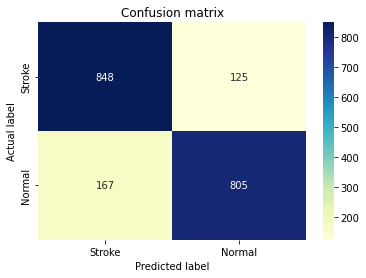

In [60]:
y_pred = ANN.predict(X_test_std)
y_pred = (y_pred > 0.5)
ANNm = confusion_matrix(y_test, y_pred)

models_results[4]=np.round(ANN.evaluate(X_test, y_test, verbose=0)[1], 3)
# confusion_matrix visualization for ArtificialNeuralNetworks
col_max(ANNm)

In [61]:
# we make a dataframe for models results 
df = pd.DataFrame(data=m_name,columns=['Model_Name'])
df1 = pd.DataFrame(data=models_results,columns=['Result'])
result = pd.concat([df,df1],axis=1)

In [62]:
result

,Model_Name,Result
0,Decision Tree,0.979434
1,Random Forest,0.992288
2,Gradient Boosting,0.858098
3,KNeighbors Classifier,0.924936
4,Artificial Neural networks,0.565000


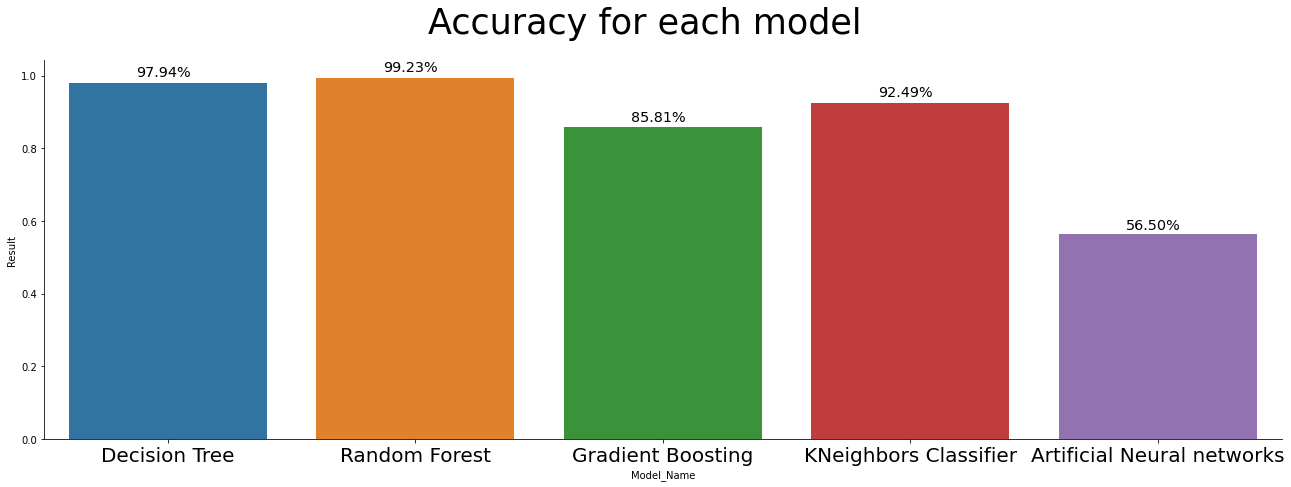

In [63]:
g = sns.catplot(x='Model_Name', y='Result', data=result,
                height=6, aspect=3, kind='bar', legend=True)
g.fig.suptitle('Accuracy for each model', size=35, y=1.1)
ax = g.facet_axis(0,0)
ax.tick_params(axis='x', which='major', labelsize=20)

# for printing accuracy persentage
for p in ax.patches:
    ax.text(p.get_x() + 0.27,
            p.get_height() * 1.02,
           '{0:.2f}%'.format(p.get_height()*100),
            color='black',
            rotation='horizontal',
            size='x-large')

In [64]:
pred1 = rfc.predict(X_test_std)
pred1

array([0, 1, 1, ..., 1, 0, 0])

In [65]:
y_test

2913    0
8359    1
7966    1
6381    1
5112    1
       ..
525     0
4598    0
6533    1
2417    0
1285    0
Name: stroke, Length: 1945, dtype: int64

In [66]:
diff = pd.DataFrame(np.c_[y_test,pred1],columns=['Actual','Predicted'])
diff

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1940,0,0
1941,0,0
1942,1,1
1943,0,0


In [67]:
from sklearn.metrics import accuracy_score
dtc_acc = accuracy_score(pred1 , y_test)
dtc_acc

0.9922879177377892

In [68]:
pickle.dump(rfc,open('model_RandomForest.pkl','wb'))

In [69]:
model = pickle.load(open('model_RandomForest.pkl','rb'))

In [70]:
model.predict(X_test_std)

array([0, 1, 1, ..., 1, 0, 0])